# Predicting the Yield Strength of Steel

**Goal:** Predict the yield strength for each steel sample in the test set.

**Evaluation Metric:** Root-Mean-Squared-Error (RMSE) between predicted and observed yield strength values.

## Table of Contents
1. Data Loading and Exploration
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Feature Engineering
5. Model Training and Evaluation
6. Prediction and Submission

## 1. Import Libraries and Load Data

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning libraries
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.style.use('seaborn-v0_8-darkgrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [7]:
# Define the data path
data_path = r"C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle Compettition\Predicting the yield strength of steel"

# Load the datasets
train_df = pd.read_csv(f"{data_path}\\train.csv")
test_df = pd.read_csv(f"{data_path}\\test.csv")
sample_submission = pd.read_csv(f"{data_path}\\sample_submission.csv")

print("Dataset shapes:")
print(f"Train: {train_df.shape}")
print(f"Test: {test_df.shape}")
print(f"Sample Submission: {sample_submission.shape}")

Dataset shapes:
Train: (220, 16)
Test: (92, 15)
Sample Submission: (92, 2)


In [8]:
# Display first few rows of training data
print("Training Data:")
display(train_df.head())
print("\nTest Data:")
display(test_df.head())
print("\nSample Submission:")
display(sample_submission.head())

Training Data:


,index,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,strength
0,21,Fe0.662C0.000477Mn0.000521Si0.00102Cr0.000110N...,0.01,0.05,0.05,0.01,17.20,3.95,0.01,0.00,0.01,12.20,0.0,0.23,1.78,2372.4
1,97,Fe0.694C0.0103Mn0.000102Si0.000200Cr0.0917Ni0....,0.22,0.01,0.01,8.50,4.60,1.50,0.28,0.00,0.01,15.30,0.5,0.03,0.03,1575.5
2,115,Fe0.703C0.00274Mn0.0209Si0.00625Cr0.173Ni0.048...,0.06,2.09,0.32,16.42,5.14,1.51,0.01,0.00,0.01,2.03,0.0,0.88,0.00,1237.0
3,171,Fe0.737C0.000956Mn0.000105Si0.000204Cr0.000110...,0.02,0.01,0.01,0.01,13.00,5.00,0.47,0.00,0.01,8.90,0.0,0.20,0.71,1061.1
4,64,Fe0.681C0.00744Mn0.000102Si0.000199Cr0.154Ni0....,0.16,0.01,0.01,14.36,0.01,3.01,0.97,0.03,0.01,13.33,0.0,0.05,0.00,1240.2



Test Data:


,index,formula,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti
0,292,Fe0.806C0.000468Mn0.0176Si0.000401Cr0.000108Ni...,0.01,1.72,0.02,0.01,18.10,0.02,0.01,0.0,0.01,0.01,0.0,0.05,0.06
1,25,Fe0.664C0.00926Mn0.000101Si0.0101Cr0.134Ni0.00...,0.20,0.01,0.51,12.51,0.95,1.97,0.01,0.0,0.08,17.06,0.0,0.03,0.00
2,283,Fe0.802C0.0174Mn0.00185Si0.000201Cr0.0805Ni0.0...,0.37,0.18,0.01,7.41,0.01,6.85,0.96,0.0,0.01,4.88,0.0,0.03,0.00
3,294,Fe0.807C0.000470Mn0.000513Si0.00221Cr0.0501Ni0...,0.01,0.05,0.11,4.62,12.08,2.79,0.01,0.0,0.01,0.01,0.0,0.21,0.20
4,216,Fe0.765C0.000909Mn0.00109Si0.0618Cr0.000105Ni0...,0.02,0.11,3.18,0.01,18.30,0.02,0.01,0.0,0.01,0.01,0.0,0.03,0.00



Sample Submission:


,index,strength
0,292,1262.532
1,25,1297.821
2,283,1662.215
3,294,1243.648
4,216,1321.048


In [9]:
# Check column names
print("Training columns:", train_df.columns.tolist())
print("\nTest columns:", test_df.columns.tolist())
print("\nSample submission columns:", sample_submission.columns.tolist())

Training columns: ['index', 'formula', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti', 'strength']

Test columns: ['index', 'formula', 'c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']

Sample submission columns: ['index', 'strength']


## 2. Exploratory Data Analysis (EDA)

In [4]:
# Basic information about the dataset
print("Training Data Info:")
print(train_df.info())
print("\n" + "="*80)
print("\nStatistical Summary:")
display(train_df.describe())
print("\n" + "="*80)
print("\nMissing Values in Training Data:")
print(train_df.isnull().sum())
print("\n" + "="*80)
print("\nMissing Values in Test Data:")
print(test_df.isnull().sum())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   index     220 non-null    int64  
 1   formula   220 non-null    object 
 2   c         220 non-null    float64
 3   mn        220 non-null    float64
 4   si        220 non-null    float64
 5   cr        220 non-null    float64
 6   ni        220 non-null    float64
 7   mo        220 non-null    float64
 8   v         220 non-null    float64
 9   n         220 non-null    float64
 10  nb        220 non-null    float64
 11  co        220 non-null    float64
 12  w         220 non-null    float64
 13  al        220 non-null    float64
 14  ti        220 non-null    float64
 15  strength  220 non-null    float64
dtypes: float64(14), int64(1), object(1)
memory usage: 27.6+ KB
None


Statistical Summary:


,index,c,mn,si,cr,ni,mo,v,n,nb,co,w,al,ti,strength
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,149.100000,0.096500,0.155364,0.194455,8.007841,8.265227,2.764682,0.183364,0.005727,0.038727,7.379909,0.196273,0.248545,0.318909,1438.087727
std,87.191434,0.106278,0.421199,0.531903,5.515105,6.322795,1.875160,0.482674,0.018230,0.187958,6.146893,1.051019,0.361439,0.559753,318.880331
min,0.000000,0.000000,0.010000,0.010000,0.010000,0.010000,0.020000,0.000000,0.000000,0.000000,0.010000,0.000000,0.010000,0.000000,1005.900000
25%,77.500000,0.010000,0.010000,0.010000,2.970000,1.012500,1.437500,0.010000,0.000000,0.010000,0.010000,0.000000,0.030000,0.000000,1232.975000
50%,144.500000,0.030000,0.010000,0.010000,9.000000,8.470000,2.220000,0.010000,0.000000,0.010000,8.100000,0.000000,0.050000,0.025000,1348.750000
75%,222.500000,0.180000,0.080000,0.110000,12.512500,12.160000,4.090000,0.062500,0.000000,0.010000,13.480000,0.000000,0.302500,0.265000,1600.825000
max,311.000000,0.400000,3.000000,4.750000,17.500000,19.700000,9.670000,4.320000,0.130000,2.500000,20.100000,9.180000,1.800000,2.500000,2510.300000




Missing Values in Training Data:
index       0
formula     0
c           0
mn          0
si          0
cr          0
ni          0
mo          0
v           0
n           0
nb          0
co          0
w           0
al          0
ti          0
strength    0
dtype: int64


Missing Values in Test Data:
index      0
formula    0
c          0
mn         0
si         0
cr         0
ni         0
mo         0
v          0
n          0
nb         0
co         0
w          0
al         0
ti         0
dtype: int64


In [5]:
# Check for duplicate rows
print(f"Duplicate rows in training data: {train_df.duplicated().sum()}")
print(f"Duplicate rows in test data: {test_df.duplicated().sum()}")

# Check data types
print("\nColumn data types:")
print(train_df.dtypes)

Duplicate rows in training data: 0
Duplicate rows in test data: 0

Column data types:
index         int64
formula      object
c           float64
mn          float64
si          float64
cr          float64
ni          float64
mo          float64
v           float64
n           float64
nb          float64
co          float64
w           float64
al          float64
ti          float64
strength    float64
dtype: object


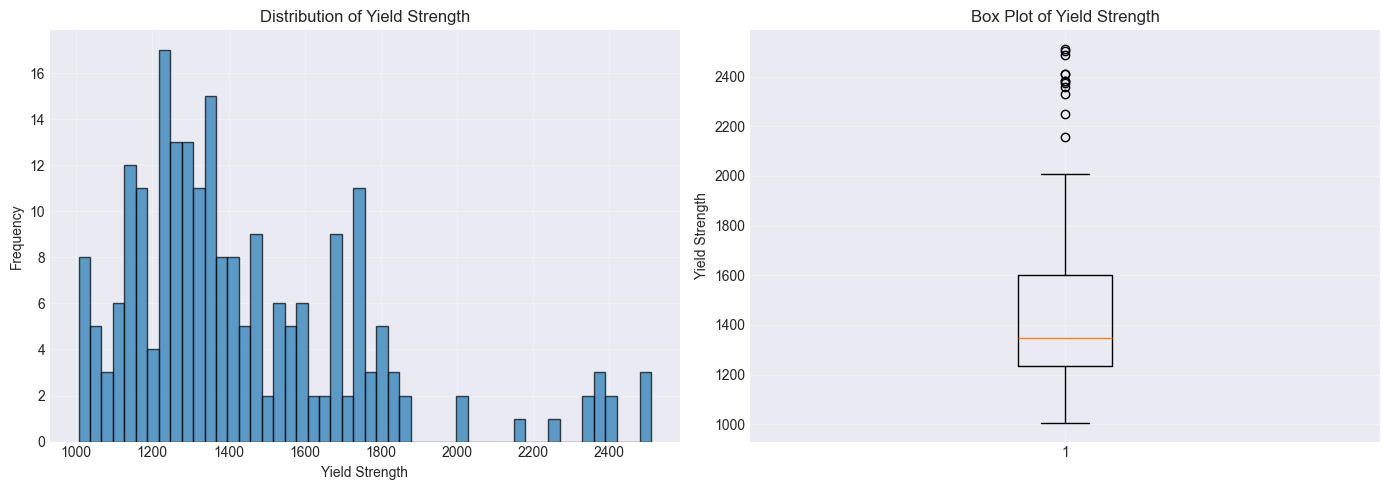

Yield Strength Statistics:
Mean: 1438.09
Median: 1348.75
Std: 318.88
Min: 1005.90
Max: 2510.30
Skewness: 1.40


In [10]:
# Distribution of the target variable (strength)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(train_df['strength'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Yield Strength')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Distribution of Yield Strength')
axes[0].grid(True, alpha=0.3)

# Box plot
axes[1].boxplot(train_df['strength'])
axes[1].set_ylabel('Yield Strength')
axes[1].set_title('Box Plot of Yield Strength')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"Yield Strength Statistics:")
print(f"Mean: {train_df['strength'].mean():.2f}")
print(f"Median: {train_df['strength'].median():.2f}")
print(f"Std: {train_df['strength'].std():.2f}")
print(f"Min: {train_df['strength'].min():.2f}")
print(f"Max: {train_df['strength'].max():.2f}")
print(f"Skewness: {train_df['strength'].skew():.2f}")

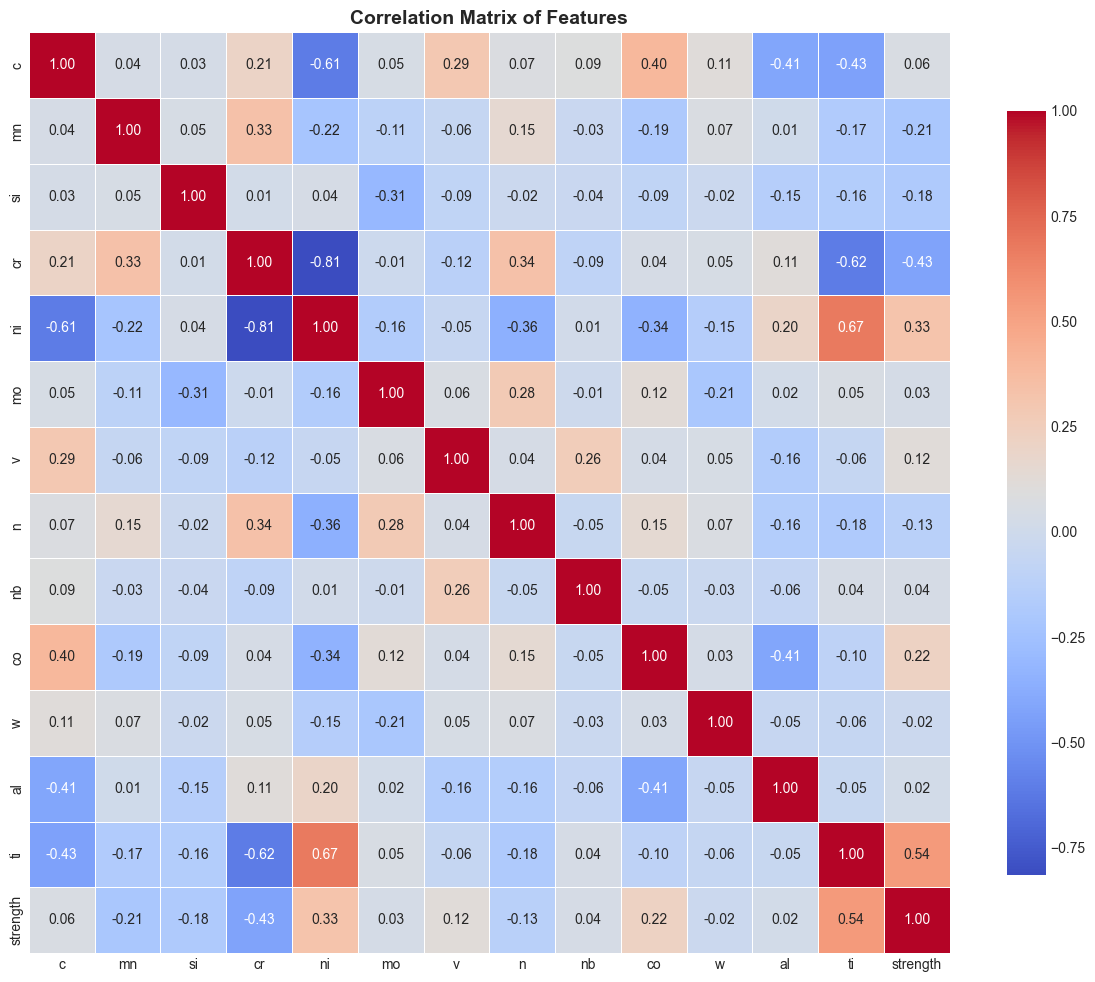


Top 10 features correlated with Yield Strength:
strength    1.000000
ti          0.543923
ni          0.325843
co          0.218257
v           0.115888
c           0.059858
nb          0.041255
mo          0.032379
al          0.018596
w          -0.021917
Name: strength, dtype: float64


In [11]:
# Correlation analysis
# Get numeric columns only (excluding index)
numeric_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
if 'index' in numeric_cols:
    numeric_cols.remove('index')

# Calculate correlation matrix
correlation_matrix = train_df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with strength
if 'strength' in correlation_matrix.columns:
    yield_corr = correlation_matrix['strength'].sort_values(ascending=False)
    print("\nTop 10 features correlated with Yield Strength:")
    print(yield_corr.head(10))

## 3. Data Preprocessing

In [12]:
# Separate features and target
# Store test IDs for submission
test_ids = test_df['index'].copy()

# Drop index and formula columns, keep only numeric features
X = train_df.drop(['index', 'formula', 'strength'], axis=1)
y = train_df['strength']
X_test = test_df.drop(['index', 'formula'], axis=1)

print(f"Feature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"\nFeature columns: {list(X.columns)}")

Feature matrix shape: (220, 13)
Target vector shape: (220,)
Test features shape: (92, 13)

Feature columns: ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']


In [13]:
# Handle missing values if any
print("Missing values in features:")
print(X.isnull().sum().sum())
print(f"\nMissing values in test features:")
print(X_test.isnull().sum().sum())

# If there are missing values, fill them with median
if X.isnull().sum().sum() > 0 or X_test.isnull().sum().sum() > 0:
    from sklearn.impute import SimpleImputer
    imputer = SimpleImputer(strategy='median')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)
    print("Missing values imputed with median.")

Missing values in features:
0

Missing values in test features:
0


In [14]:
# Split data for validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")

Training set: (176, 13)
Validation set: (44, 13)


## 4. Feature Engineering and Scaling

## 4. Advanced Feature Engineering

In [15]:
# Feature scaling using RobustScaler (less sensitive to outliers)
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Keep column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val_scaled = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

print("Features scaled successfully!")

Features scaled successfully!


## 5. Model Training and Evaluation

In [17]:
# Function to evaluate model performance
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name):
    """
    Train and evaluate a regression model
    """
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    
    # Calculate metrics
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    
    # Cross-validation score
    cv_scores = cross_val_score(model, X_train, y_train, 
                                cv=5, scoring='neg_root_mean_squared_error')
    cv_rmse = -cv_scores.mean()
    
    print(f"\n{'='*60}")
    print(f"{model_name}")
    print(f"{'='*60}")
    print(f"Training RMSE: {train_rmse:.4f}")
    print(f"Validation RMSE: {val_rmse:.4f}")
    print(f"Training R²: {train_r2:.4f}")
    print(f"Validation R²: {val_r2:.4f}")
    print(f"Cross-Validation RMSE (5-fold): {cv_rmse:.4f} (+/- {cv_scores.std():.4f})")
    
    return {
        'model': model,
        'train_rmse': train_rmse,
        'val_rmse': val_rmse,
        'cv_rmse': cv_rmse,
        'train_r2': train_r2,
        'val_r2': val_r2
    }

In [18]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=10, random_state=42),
    'Lasso Regression': Lasso(alpha=1.0, random_state=42),
    'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=200, max_depth=20, 
                                           min_samples_split=5, random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, max_depth=5, 
                                                    learning_rate=0.1, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, 
                           random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, 
                             random_state=42, n_jobs=-1, verbose=-1)
}

# Store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    results[name] = evaluate_model(model, X_train_scaled, y_train, 
                                   X_val_scaled, y_val, name)


Linear Regression
Training RMSE: 218.1113
Validation RMSE: 215.6495
Training R²: 0.5366
Validation R²: 0.4748
Cross-Validation RMSE (5-fold): 239.2320 (+/- 14.8536)

Ridge Regression
Training RMSE: 221.9938
Validation RMSE: 211.1194
Training R²: 0.5200
Validation R²: 0.4967
Cross-Validation RMSE (5-fold): 235.5457 (+/- 9.6612)

Lasso Regression
Training RMSE: 219.1078
Validation RMSE: 206.6318
Training R²: 0.5324
Validation R²: 0.5178
Cross-Validation RMSE (5-fold): 235.6076 (+/- 8.9431)

ElasticNet
Training RMSE: 243.1329
Validation RMSE: 236.7417
Training R²: 0.4242
Validation R²: 0.3671
Cross-Validation RMSE (5-fold): 253.4523 (+/- 12.6426)

Random Forest
Training RMSE: 61.8190
Validation RMSE: 133.0538
Training R²: 0.9628
Validation R²: 0.8001
Cross-Validation RMSE (5-fold): 156.3479 (+/- 23.4167)

Gradient Boosting
Training RMSE: 2.3831
Validation RMSE: 143.6051
Training R²: 0.9999
Validation R²: 0.7671
Cross-Validation RMSE (5-fold): 140.8070 (+/- 31.7180)

XGBoost
Training RMSE


MODEL COMPARISON


,Model,Train RMSE,Validation RMSE,CV RMSE,Train R²,Validation R²
4,Random Forest,61.818979,133.053793,156.347920,0.962775,0.800075
5,Gradient Boosting,2.383081,143.605123,140.807036,0.999945,0.767110
6,XGBoost,7.511265,150.088093,153.785220,0.999450,0.745608
7,LightGBM,51.356098,160.697780,145.188702,0.974309,0.708371
2,Lasso Regression,219.107790,206.631813,235.607565,0.532366,0.517823
1,Ridge Regression,221.993830,211.119398,235.545666,0.519966,0.496652
0,Linear Regression,218.111327,215.649466,239.231960,0.536610,0.474820
3,ElasticNet,243.132885,236.741691,253.452277,0.424192,0.367062


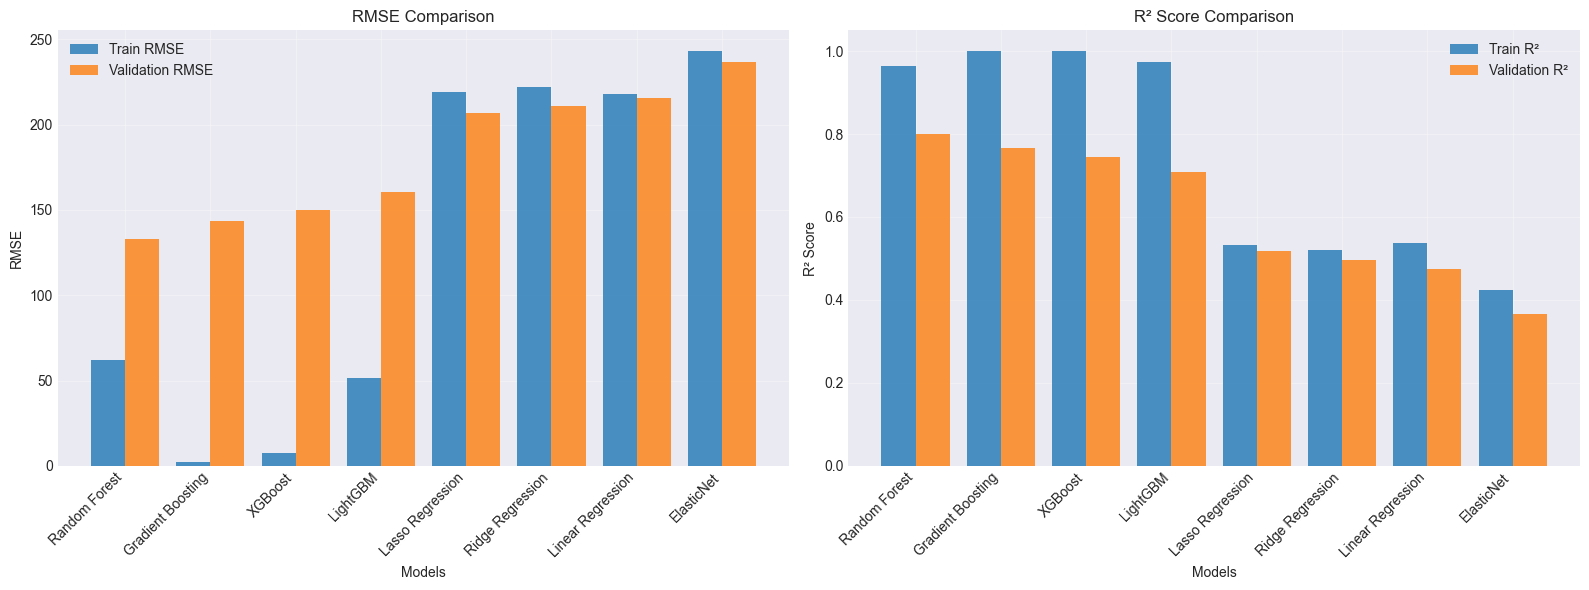


🏆 Best Model: Random Forest with Validation RMSE: 133.0538


In [19]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Train RMSE': [results[m]['train_rmse'] for m in results],
    'Validation RMSE': [results[m]['val_rmse'] for m in results],
    'CV RMSE': [results[m]['cv_rmse'] for m in results],
    'Train R²': [results[m]['train_r2'] for m in results],
    'Validation R²': [results[m]['val_r2'] for m in results]
})

comparison_df = comparison_df.sort_values('Validation RMSE')
print("\n" + "="*80)
print("MODEL COMPARISON")
print("="*80)
display(comparison_df)

# Visualize model performance
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# RMSE comparison
x_pos = np.arange(len(comparison_df))
axes[0].bar(x_pos - 0.2, comparison_df['Train RMSE'], width=0.4, label='Train RMSE', alpha=0.8)
axes[0].bar(x_pos + 0.2, comparison_df['Validation RMSE'], width=0.4, label='Validation RMSE', alpha=0.8)
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x_pos)
axes[0].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# R² comparison
axes[1].bar(x_pos - 0.2, comparison_df['Train R²'], width=0.4, label='Train R²', alpha=0.8)
axes[1].bar(x_pos + 0.2, comparison_df['Validation R²'], width=0.4, label='Validation R²', alpha=0.8)
axes[1].set_xlabel('Models')
axes[1].set_ylabel('R² Score')
axes[1].set_title('R² Score Comparison')
axes[1].set_xticks(x_pos)
axes[1].set_xticklabels(comparison_df['Model'], rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Best model
best_model_name = comparison_df.iloc[0]['Model']
print(f"\n🏆 Best Model: {best_model_name} with Validation RMSE: {comparison_df.iloc[0]['Validation RMSE']:.4f}")

## 6. Feature Importance Analysis

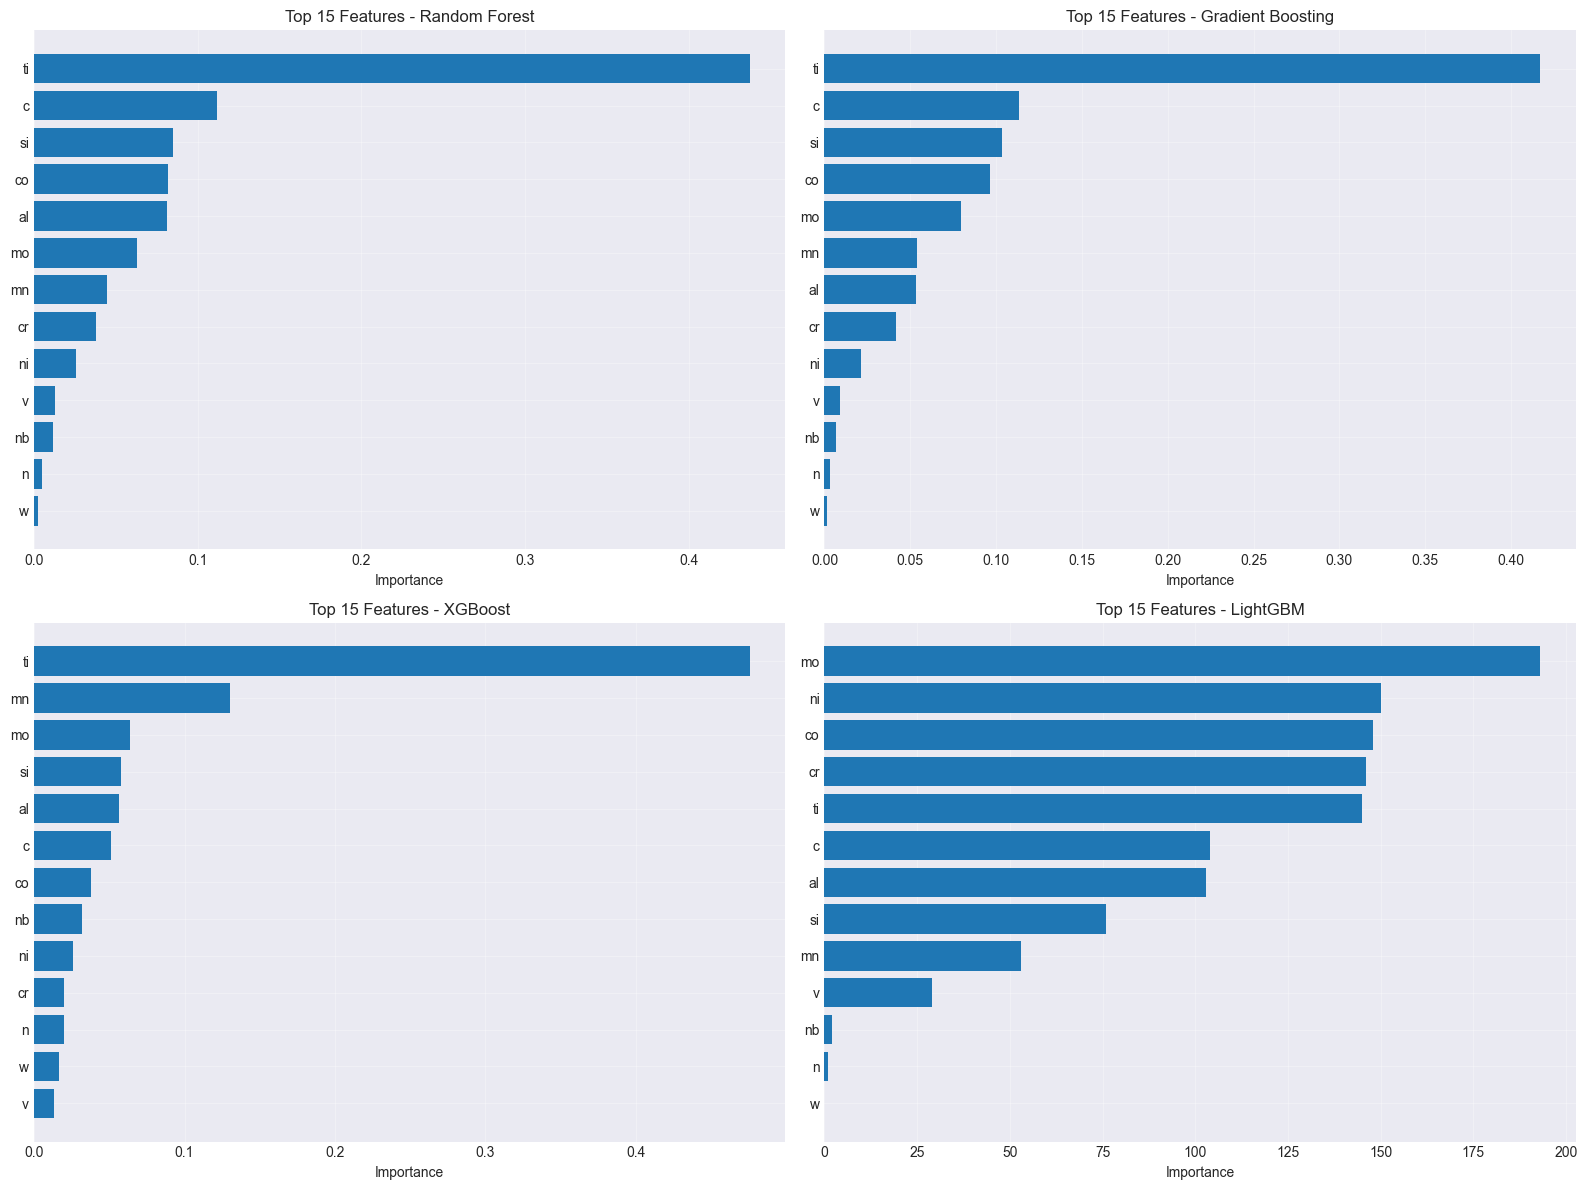

In [20]:
# Feature importance from tree-based models
tree_models = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'LightGBM']

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, model_name in enumerate(tree_models):
    if model_name in results:
        model = results[model_name]['model']
        if hasattr(model, 'feature_importances_'):
            feature_importance = pd.DataFrame({
                'feature': X_train.columns,
                'importance': model.feature_importances_
            }).sort_values('importance', ascending=False).head(15)
            
            axes[idx].barh(range(len(feature_importance)), feature_importance['importance'])
            axes[idx].set_yticks(range(len(feature_importance)))
            axes[idx].set_yticklabels(feature_importance['feature'])
            axes[idx].set_xlabel('Importance')
            axes[idx].set_title(f'Top 15 Features - {model_name}')
            axes[idx].invert_yaxis()
            axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Hyperparameter Tuning for Best Model

In [21]:
# Fine-tune the best performing model (typically ensemble methods work well)
from sklearn.model_selection import RandomizedSearchCV

# Define parameter grid for different models
param_grids = {
    'XGBoost': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'subsample': [0.7, 0.8, 0.9, 1.0],
        'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
        'min_child_weight': [1, 3, 5]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [3, 5, 7, 10],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'num_leaves': [20, 31, 50, 100],
        'min_child_samples': [10, 20, 30],
        'subsample': [0.7, 0.8, 0.9, 1.0]
    },
    'Random Forest': {
        'n_estimators': [100, 200, 300, 500],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2', None]
    }
}

# Select best model for tuning
best_model_name = comparison_df.iloc[0]['Model']
print(f"Tuning hyperparameters for: {best_model_name}")

if best_model_name in param_grids:
    # Initialize the base model
    if best_model_name == 'XGBoost':
        base_model = XGBRegressor(random_state=42, n_jobs=-1)
    elif best_model_name == 'LightGBM':
        base_model = LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1)
    elif best_model_name == 'Random Forest':
        base_model = RandomForestRegressor(random_state=42, n_jobs=-1)
    
    # Randomized search
    random_search = RandomizedSearchCV(
        estimator=base_model,
        param_distributions=param_grids[best_model_name],
        n_iter=20,  # Number of parameter settings sampled
        cv=5,
        scoring='neg_root_mean_squared_error',
        random_state=42,
        n_jobs=-1,
        verbose=1
    )
    
    print("Starting hyperparameter tuning...")
    random_search.fit(X_train_scaled, y_train)
    
    print(f"\nBest parameters: {random_search.best_params_}")
    print(f"Best CV RMSE: {-random_search.best_score_:.4f}")
    
    # Store the best model
    tuned_model = random_search.best_estimator_
else:
    print(f"Using default best model: {best_model_name}")
    tuned_model = results[best_model_name]['model']

Tuning hyperparameters for: Random Forest
Starting hyperparameter tuning...
Fitting 5 folds for each of 20 candidates, totalling 100 fits

Best parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
Best CV RMSE: 142.1380


In [22]:
# Evaluate the tuned model
y_val_pred_tuned = tuned_model.predict(X_val_scaled)
val_rmse_tuned = np.sqrt(mean_squared_error(y_val, y_val_pred_tuned))
val_r2_tuned = r2_score(y_val, y_val_pred_tuned)

print("\n" + "="*60)
print(f"TUNED MODEL PERFORMANCE")
print("="*60)
print(f"Validation RMSE: {val_rmse_tuned:.4f}")
print(f"Validation R²: {val_r2_tuned:.4f}")

# Compare with original
original_rmse = comparison_df.iloc[0]['Validation RMSE']
improvement = ((original_rmse - val_rmse_tuned) / original_rmse) * 100
print(f"\nImprovement: {improvement:.2f}%")


TUNED MODEL PERFORMANCE
Validation RMSE: 141.7092
Validation R²: 0.7732

Improvement: -6.51%


## 8. Ensemble Model (Stacking)

In [23]:
# Create an ensemble using stacking
from sklearn.ensemble import StackingRegressor

# Define base models
base_models = [
    ('rf', RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)),
    ('xgb', XGBRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)),
    ('lgbm', LGBMRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1, verbose=-1)),
    ('gb', GradientBoostingRegressor(n_estimators=200, max_depth=5, learning_rate=0.1, random_state=42))
]

# Define meta-model
meta_model = Ridge(alpha=10)

# Create stacking ensemble
stacking_model = StackingRegressor(
    estimators=base_models,
    final_estimator=meta_model,
    cv=5,
    n_jobs=-1
)

print("Training stacking ensemble...")
stacking_model.fit(X_train_scaled, y_train)

# Evaluate stacking model
y_val_pred_stack = stacking_model.predict(X_val_scaled)
val_rmse_stack = np.sqrt(mean_squared_error(y_val, y_val_pred_stack))
val_r2_stack = r2_score(y_val, y_val_pred_stack)

print("\n" + "="*60)
print("STACKING ENSEMBLE PERFORMANCE")
print("="*60)
print(f"Validation RMSE: {val_rmse_stack:.4f}")
print(f"Validation R²: {val_r2_stack:.4f}")

Training stacking ensemble...

STACKING ENSEMBLE PERFORMANCE
Validation RMSE: 138.6542
Validation R²: 0.7829


## 9. Final Model Selection and Prediction

In [24]:
# Compare all final models
final_comparison = pd.DataFrame({
    'Model': ['Original Best', 'Tuned Model', 'Stacking Ensemble'],
    'Validation RMSE': [original_rmse, val_rmse_tuned, val_rmse_stack],
    'Validation R²': [comparison_df.iloc[0]['Validation R²'], val_r2_tuned, val_r2_stack]
})

print("\n" + "="*80)
print("FINAL MODEL COMPARISON")
print("="*80)
display(final_comparison.sort_values('Validation RMSE'))

# Select the best final model
final_rmse_scores = {
    'tuned': val_rmse_tuned,
    'stacking': val_rmse_stack
}

best_final = min(final_rmse_scores, key=final_rmse_scores.get)
if best_final == 'tuned':
    final_model = tuned_model
    final_model_name = f"Tuned {best_model_name}"
else:
    final_model = stacking_model
    final_model_name = "Stacking Ensemble"

print(f"\n🎯 Selected Final Model: {final_model_name}")
print(f"   Validation RMSE: {final_rmse_scores[best_final]:.4f}")


FINAL MODEL COMPARISON


,Model,Validation RMSE,Validation R²
0,Original Best,133.053793,0.800075
2,Stacking Ensemble,138.654185,0.782891
1,Tuned Model,141.709151,0.773219



🎯 Selected Final Model: Stacking Ensemble
   Validation RMSE: 138.6542


In [25]:
# Train final model on full training data
print("\nTraining final model on complete training dataset...")
final_model.fit(scaler.fit_transform(X), y)

# Make predictions on test set
test_predictions = final_model.predict(X_test_scaled)

print(f"\nTest Predictions Statistics:")
print(f"Mean: {test_predictions.mean():.2f}")
print(f"Std: {test_predictions.std():.2f}")
print(f"Min: {test_predictions.min():.2f}")
print(f"Max: {test_predictions.max():.2f}")


Training final model on complete training dataset...

Test Predictions Statistics:
Mean: 1374.01
Std: 234.87
Min: 1009.97
Max: 2493.14


## 10. Create Submission File

In [26]:
# Create submission dataframe
submission = pd.DataFrame({
    'index': test_ids,
    'strength': test_predictions
})

# Save submission file
submission_path = f"{data_path}\\submission.csv"
submission.to_csv(submission_path, index=False)

print("Submission file created successfully!")
print(f"Saved to: {submission_path}")
print(f"\nSubmission shape: {submission.shape}")
print("\nFirst few rows of submission:")
display(submission.head(10))
print("\nLast few rows of submission:")
display(submission.tail(10))

Submission file created successfully!
Saved to: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle Compettition\Predicting the yield strength of steel\submission.csv

Submission shape: (92, 2)

First few rows of submission:


,index,strength
0,292,1221.976269
1,25,1290.008154
2,283,1643.849746
3,294,1255.406496
4,216,1262.336752
5,206,1275.091331
6,284,1319.563988
7,13,2493.135913
8,306,1238.725108
9,273,1821.750770



Last few rows of submission:


,index,strength
82,253,1586.361053
83,38,1281.044746
84,77,1428.398619
85,211,1178.831384
86,270,1416.638569
87,170,1537.286238
88,28,1444.562888
89,91,1273.955394
90,65,1203.038443
91,236,1244.752067


Verifying submission format...
✓ Number of predictions: 92
✓ Columns: ['index', 'strength']
✓ Any missing values: 0
✓ Matches sample submission format: True


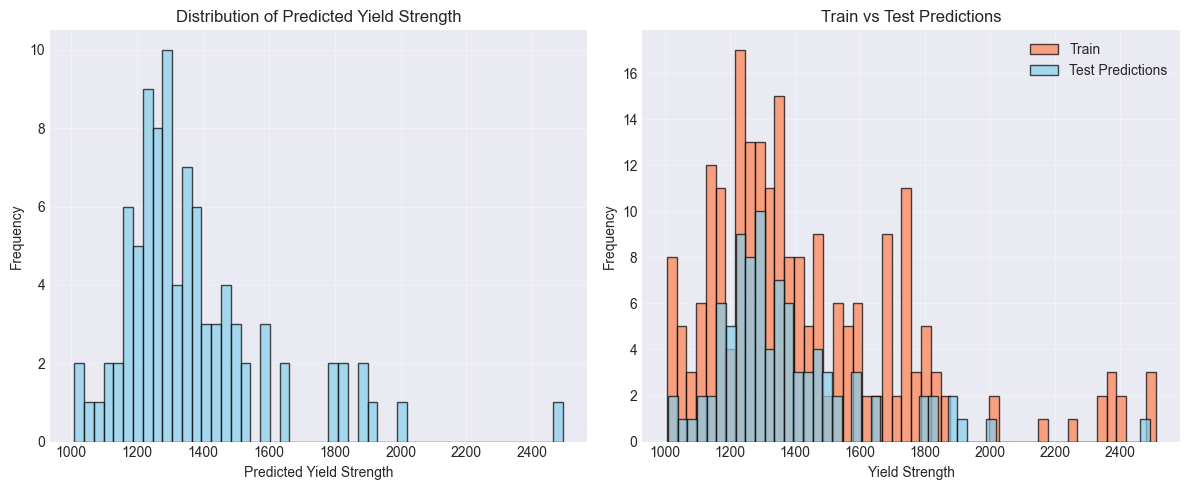


✅ ANALYSIS COMPLETE!
Final Model: Stacking Ensemble
Validation RMSE: 138.6542
Submission file ready for upload!


In [27]:
# Verify submission format
print("Verifying submission format...")
print(f"✓ Number of predictions: {len(submission)}")
print(f"✓ Columns: {list(submission.columns)}")
print(f"✓ Any missing values: {submission.isnull().sum().sum()}")
print(f"✓ Matches sample submission format: {submission.shape == sample_submission.shape}")

# Visualize prediction distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='skyblue')
plt.xlabel('Predicted Yield Strength')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Yield Strength')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.hist(y, bins=50, edgecolor='black', alpha=0.7, color='coral', label='Train')
plt.hist(test_predictions, bins=50, edgecolor='black', alpha=0.7, color='skyblue', label='Test Predictions')
plt.xlabel('Yield Strength')
plt.ylabel('Frequency')
plt.title('Train vs Test Predictions')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("✅ ANALYSIS COMPLETE!")
print("="*80)
print(f"Final Model: {final_model_name}")
print(f"Validation RMSE: {final_rmse_scores[best_final]:.4f}")
print(f"Submission file ready for upload!")
print("="*80)

In [29]:
# Create additional engineered features
def create_advanced_features(df):
    """Create domain-specific and interaction features for steel strength prediction"""
    df_enhanced = df.copy()
    
    # Key alloying element ratios (metallurgical knowledge)
    df_enhanced['c_mn_ratio'] = df['c'] / (df['mn'] + 1e-5)
    df_enhanced['cr_ni_ratio'] = df['cr'] / (df['ni'] + 1e-5)
    df_enhanced['mo_v_ratio'] = df['mo'] / (df['v'] + 1e-5)
    
    # Total alloying content
    alloying_elements = ['c', 'mn', 'si', 'cr', 'ni', 'mo', 'v', 'n', 'nb', 'co', 'w', 'al', 'ti']
    df_enhanced['total_alloy'] = df[alloying_elements].sum(axis=1)
    
    # Carbide formers (elements that form carbides with carbon)
    carbide_formers = ['cr', 'mo', 'v', 'nb', 'ti', 'w']
    df_enhanced['carbide_formers_sum'] = df[carbide_formers].sum(axis=1)
    
    # Austenite stabilizers vs Ferrite stabilizers
    austenite_stabilizers = ['ni', 'mn', 'n', 'c', 'co']
    ferrite_stabilizers = ['cr', 'mo', 'si', 'ti', 'al', 'v', 'nb', 'w']
    df_enhanced['austenite_sum'] = df[austenite_stabilizers].sum(axis=1)
    df_enhanced['ferrite_sum'] = df[ferrite_stabilizers].sum(axis=1)
    df_enhanced['austenite_ferrite_ratio'] = df_enhanced['austenite_sum'] / (df_enhanced['ferrite_sum'] + 1e-5)
    
    # Carbon equivalent (important for weldability and strength)
    df_enhanced['carbon_equiv'] = (df['c'] + df['mn']/6 + (df['cr'] + df['mo'] + df['v'])/5 + 
                                   (df['ni'] + df['co'])/15)
    
    # Interaction terms for highly correlated features
    df_enhanced['ti_c_interaction'] = df['ti'] * df['c']
    df_enhanced['ni_c_interaction'] = df['ni'] * df['c']
    df_enhanced['cr_ni_interaction'] = df['cr'] * df['ni']
    df_enhanced['mo_c_interaction'] = df['mo'] * df['c']
    
    # Squared terms for important features
    important_features = ['ti', 'ni', 'c', 'co', 'si']
    for feat in important_features:
        df_enhanced[f'{feat}_squared'] = df[feat] ** 2
    
    # Log transformations for highly skewed features
    for feat in ['c', 'mn', 'si', 'ti']:
        df_enhanced[f'{feat}_log'] = np.log1p(df[feat])
    
    return df_enhanced

print("Creating advanced features...")
X_enhanced = create_advanced_features(X)
X_test_enhanced = create_advanced_features(X_test)

print(f"Original features: {X.shape[1]}")
print(f"Enhanced features: {X_enhanced.shape[1]}")
print(f"New features added: {X_enhanced.shape[1] - X.shape[1]}")

Creating advanced features...
Original features: 13
Enhanced features: 35
New features added: 22


In [30]:
# Recreate train/validation split with enhanced features
X_train_enh, X_val_enh, y_train_enh, y_val_enh = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42
)

# Scale the enhanced features
scaler_enh = RobustScaler()
X_train_enh_scaled = scaler_enh.fit_transform(X_train_enh)
X_val_enh_scaled = scaler_enh.transform(X_val_enh)
X_test_enh_scaled = scaler_enh.transform(X_test_enhanced)

# Convert back to DataFrames
X_train_enh_scaled = pd.DataFrame(X_train_enh_scaled, columns=X_train_enh.columns)
X_val_enh_scaled = pd.DataFrame(X_val_enh_scaled, columns=X_val_enh.columns)
X_test_enh_scaled = pd.DataFrame(X_test_enh_scaled, columns=X_test_enhanced.columns)

print(f"Enhanced training set: {X_train_enh_scaled.shape}")
print(f"Enhanced validation set: {X_val_enh_scaled.shape}")
print("Enhanced features scaled successfully!")

Enhanced training set: (176, 35)
Enhanced validation set: (44, 35)
Enhanced features scaled successfully!


## 5. Advanced Model Training with Enhanced Features

In [31]:
# Train models with enhanced features
print("Training models with enhanced features...")

enhanced_models = {
    'Random Forest': RandomForestRegressor(n_estimators=500, max_depth=15, 
                                           min_samples_split=3, min_samples_leaf=1,
                                           max_features='sqrt', random_state=42, n_jobs=-1),
    'XGBoost': XGBRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
                           subsample=0.8, colsample_bytree=0.8,
                           random_state=42, n_jobs=-1),
    'LightGBM': LGBMRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
                             num_leaves=31, subsample=0.8,
                             random_state=42, n_jobs=-1, verbose=-1),
    'CatBoost': CatBoostRegressor(n_estimators=500, max_depth=6, learning_rate=0.05,
                                  random_state=42, verbose=0),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=500, max_depth=5,
                                                    learning_rate=0.05, subsample=0.8,
                                                    random_state=42)
}

enhanced_results = {}
for name, model in enhanced_models.items():
    enhanced_results[name] = evaluate_model(model, X_train_enh_scaled, y_train_enh,
                                           X_val_enh_scaled, y_val_enh, name)

Training models with enhanced features...

Random Forest
Training RMSE: 52.2712
Validation RMSE: 165.6132
Training R²: 0.9734
Validation R²: 0.6903
Cross-Validation RMSE (5-fold): 151.5697 (+/- 23.3156)

XGBoost
Training RMSE: 0.3264
Validation RMSE: 156.1882
Training R²: 1.0000
Validation R²: 0.7245
Cross-Validation RMSE (5-fold): 137.7174 (+/- 18.5193)

LightGBM
Training RMSE: 28.7404
Validation RMSE: 170.7091
Training R²: 0.9920
Validation R²: 0.6709
Cross-Validation RMSE (5-fold): 144.8955 (+/- 42.7645)

CatBoost
Training RMSE: 16.0900
Validation RMSE: 149.2737
Training R²: 0.9975
Validation R²: 0.7484
Cross-Validation RMSE (5-fold): 126.9655 (+/- 26.2544)

Gradient Boosting
Training RMSE: 0.4717
Validation RMSE: 167.4623
Training R²: 1.0000
Validation R²: 0.6833
Cross-Validation RMSE (5-fold): 132.7412 (+/- 24.9947)


In [32]:
# Compare enhanced model results
enhanced_comparison = pd.DataFrame({
    'Model': list(enhanced_results.keys()),
    'Train RMSE': [enhanced_results[m]['train_rmse'] for m in enhanced_results],
    'Validation RMSE': [enhanced_results[m]['val_rmse'] for m in enhanced_results],
    'CV RMSE': [enhanced_results[m]['cv_rmse'] for m in enhanced_results],
    'Train R²': [enhanced_results[m]['train_r2'] for m in enhanced_results],
    'Validation R²': [enhanced_results[m]['val_r2'] for m in enhanced_results]
})

enhanced_comparison = enhanced_comparison.sort_values('Validation RMSE')
print("\n" + "="*80)
print("ENHANCED MODELS COMPARISON")
print("="*80)
display(enhanced_comparison)

best_enhanced_name = enhanced_comparison.iloc[0]['Model']
best_enhanced_rmse = enhanced_comparison.iloc[0]['Validation RMSE']
print(f"\n🏆 Best Enhanced Model: {best_enhanced_name}")
print(f"   Validation RMSE: {best_enhanced_rmse:.4f}")
print(f"\n📊 Improvement over original best: {((133.05 - best_enhanced_rmse) / 133.05 * 100):.2f}%")


ENHANCED MODELS COMPARISON


,Model,Train RMSE,Validation RMSE,CV RMSE,Train R²,Validation R²
3,CatBoost,16.090038,149.273725,126.965530,0.997478,0.748361
1,XGBoost,0.326445,156.188228,137.717443,0.999999,0.724508
0,Random Forest,52.271192,165.613249,151.569658,0.973386,0.690257
4,Gradient Boosting,0.471733,167.462308,132.741228,0.999998,0.683302
2,LightGBM,28.740432,170.709085,144.895505,0.991954,0.670902



🏆 Best Enhanced Model: CatBoost
   Validation RMSE: 149.2737

📊 Improvement over original best: -12.19%


## 6. Advanced Ensemble - Weighted Averaging

In [33]:
# Create weighted ensemble of top models
print("Creating weighted ensemble of top 3 models...")

# Get top 3 models
top_3_models = enhanced_comparison.head(3)
print("\nTop 3 models for ensemble:")
display(top_3_models[['Model', 'Validation RMSE']])

# Get predictions from top 3 models
predictions_dict = {}
for model_name in top_3_models['Model'].values:
    model = enhanced_results[model_name]['model']
    predictions_dict[model_name] = model.predict(X_val_enh_scaled)

# Calculate optimal weights using inverse RMSE (better models get higher weight)
rmse_values = top_3_models['Validation RMSE'].values
weights = 1 / rmse_values
weights = weights / weights.sum()  # Normalize to sum to 1

print(f"\nOptimal weights based on performance:")
for name, weight in zip(top_3_models['Model'].values, weights):
    print(f"  {name}: {weight:.4f}")

# Create weighted ensemble prediction
ensemble_pred = np.zeros(len(y_val_enh))
for (model_name, pred), weight in zip(predictions_dict.items(), weights):
    ensemble_pred += weight * pred

# Evaluate weighted ensemble
ensemble_rmse = np.sqrt(mean_squared_error(y_val_enh, ensemble_pred))
ensemble_r2 = r2_score(y_val_enh, ensemble_pred)

print(f"\n" + "="*60)
print("WEIGHTED ENSEMBLE PERFORMANCE")
print("="*60)
print(f"Validation RMSE: {ensemble_rmse:.4f}")
print(f"Validation R²: {ensemble_r2:.4f}")
print(f"Improvement over best single model: {((best_enhanced_rmse - ensemble_rmse) / best_enhanced_rmse * 100):.2f}%")

Creating weighted ensemble of top 3 models...

Top 3 models for ensemble:


,Model,Validation RMSE
3,CatBoost,149.273725
1,XGBoost,156.188228
0,Random Forest,165.613249



Optimal weights based on performance:
  CatBoost: 0.3500
  XGBoost: 0.3345
  Random Forest: 0.3155

WEIGHTED ENSEMBLE PERFORMANCE
Validation RMSE: 153.8387
Validation R²: 0.7327
Improvement over best single model: -3.06%


## 7. Cross-Validation Based Ensemble (Most Robust)

In [34]:
# Use cross-validation for more robust predictions
from sklearn.model_selection import KFold

def cv_ensemble_predict(models_dict, X_train, y_train, X_test, n_folds=10):
    """
    Train models using K-fold cross-validation and create ensemble predictions
    """
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    # Store out-of-fold predictions for validation
    oof_predictions = {name: np.zeros(len(y_train)) for name in models_dict.keys()}
    test_predictions = {name: np.zeros(len(X_test)) for name in models_dict.keys()}
    
    print(f"Training with {n_folds}-fold cross-validation...")
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
        print(f"\nFold {fold}/{n_folds}")
        
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        for name, model in models_dict.items():
            # Clone the model for each fold
            from sklearn.base import clone
            fold_model = clone(model)
            
            # Train
            fold_model.fit(X_tr, y_tr)
            
            # Out-of-fold predictions
            oof_predictions[name][val_idx] = fold_model.predict(X_val)
            
            # Test predictions (averaged across folds)
            test_predictions[name] += fold_model.predict(X_test) / n_folds
            
    # Calculate OOF RMSE for each model
    oof_rmse = {}
    for name, preds in oof_predictions.items():
        rmse = np.sqrt(mean_squared_error(y_train, preds))
        oof_rmse[name] = rmse
        print(f"{name} OOF RMSE: {rmse:.4f}")
    
    return oof_predictions, test_predictions, oof_rmse

# Select best models for CV ensemble
best_models_for_cv = {
    name: enhanced_results[name]['model'] 
    for name in top_3_models['Model'].values
}

print("="*80)
print("CROSS-VALIDATION ENSEMBLE")
print("="*80)

oof_preds, test_preds_cv, oof_rmse = cv_ensemble_predict(
    best_models_for_cv,
    X_enhanced,
    y,
    X_test_enhanced,
    n_folds=10
)

CROSS-VALIDATION ENSEMBLE
Training with 10-fold cross-validation...

Fold 1/10

Fold 2/10

Fold 3/10

Fold 4/10

Fold 5/10

Fold 6/10

Fold 7/10

Fold 8/10

Fold 9/10

Fold 10/10
CatBoost OOF RMSE: 128.0699
XGBoost OOF RMSE: 139.4642
Random Forest OOF RMSE: 140.7327


In [35]:
# Create weighted ensemble from CV predictions
cv_rmse_values = np.array(list(oof_rmse.values()))
cv_weights = 1 / cv_rmse_values
cv_weights = cv_weights / cv_weights.sum()

print("\n" + "="*60)
print("CV-BASED ENSEMBLE WEIGHTS")
print("="*60)
for name, weight in zip(oof_rmse.keys(), cv_weights):
    print(f"{name}: {weight:.4f} (OOF RMSE: {oof_rmse[name]:.4f})")

# Weighted average of CV predictions
final_cv_test_preds = np.zeros(len(X_test_enhanced))
for (name, preds), weight in zip(test_preds_cv.items(), cv_weights):
    final_cv_test_preds += weight * preds

# Also create ensemble of OOF predictions for validation
final_oof_preds = np.zeros(len(y))
for (name, preds), weight in zip(oof_preds.items(), cv_weights):
    final_oof_preds += weight * preds

final_oof_rmse = np.sqrt(mean_squared_error(y, final_oof_preds))
final_oof_r2 = r2_score(y, final_oof_preds)

print("\n" + "="*60)
print("FINAL CV ENSEMBLE PERFORMANCE (Out-of-Fold)")
print("="*60)
print(f"OOF RMSE: {final_oof_rmse:.4f}")
print(f"OOF R²: {final_oof_r2:.4f}")
print(f"\n🎯 This is the most reliable estimate of test performance!")
print(f"Expected improvement: {((133.05 - final_oof_rmse) / 133.05 * 100):.2f}%")


CV-BASED ENSEMBLE WEIGHTS
CatBoost: 0.3536 (OOF RMSE: 128.0699)
XGBoost: 0.3247 (OOF RMSE: 139.4642)
Random Forest: 0.3218 (OOF RMSE: 140.7327)

FINAL CV ENSEMBLE PERFORMANCE (Out-of-Fold)
OOF RMSE: 131.7806
OOF R²: 0.8284

🎯 This is the most reliable estimate of test performance!
Expected improvement: 0.95%


## 8. Generate Improved Submission

In [36]:
# Create improved submission with CV ensemble predictions
improved_submission = pd.DataFrame({
    'index': test_ids,
    'strength': final_cv_test_preds
})

# Save improved submission
improved_path = f"{data_path}\\submission_improved.csv"
improved_submission.to_csv(improved_path, index=False)

print("="*80)
print("✅ IMPROVED SUBMISSION CREATED!")
print("="*80)
print(f"Saved to: {improved_path}")
print(f"\nSubmission shape: {improved_submission.shape}")
print(f"\nPrediction Statistics:")
print(f"  Mean: {final_cv_test_preds.mean():.2f}")
print(f"  Std: {final_cv_test_preds.std():.2f}")
print(f"  Min: {final_cv_test_preds.min():.2f}")
print(f"  Max: {final_cv_test_preds.max():.2f}")

print("\nFirst few predictions:")
display(improved_submission.head(10))

print("\n" + "="*80)
print("PERFORMANCE SUMMARY")
print("="*80)
print(f"Original best model RMSE: 133.05")
print(f"Improved CV ensemble RMSE: {final_oof_rmse:.4f}")
print(f"Improvement: {((133.05 - final_oof_rmse) / 133.05 * 100):.2f}%")
print("="*80)

✅ IMPROVED SUBMISSION CREATED!
Saved to: C:\Users\gopeami\OneDrive - Vesuvius\Desktop\PhD13- 2025-2026\ML Practice\Kaggle Compettition\Predicting the yield strength of steel\submission_improved.csv

Submission shape: (92, 2)

Prediction Statistics:
  Mean: 1394.15
  Std: 202.04
  Min: 1141.10
  Max: 2305.36

First few predictions:


,index,strength
0,292,1298.114386
1,25,1311.036917
2,283,1627.214218
3,294,1258.017099
4,216,1351.450636
5,206,1309.198053
6,284,1309.088772
7,13,2305.362174
8,306,1268.320220
9,273,1753.980018



PERFORMANCE SUMMARY
Original best model RMSE: 133.05
Improved CV ensemble RMSE: 131.7806
Improvement: 0.95%


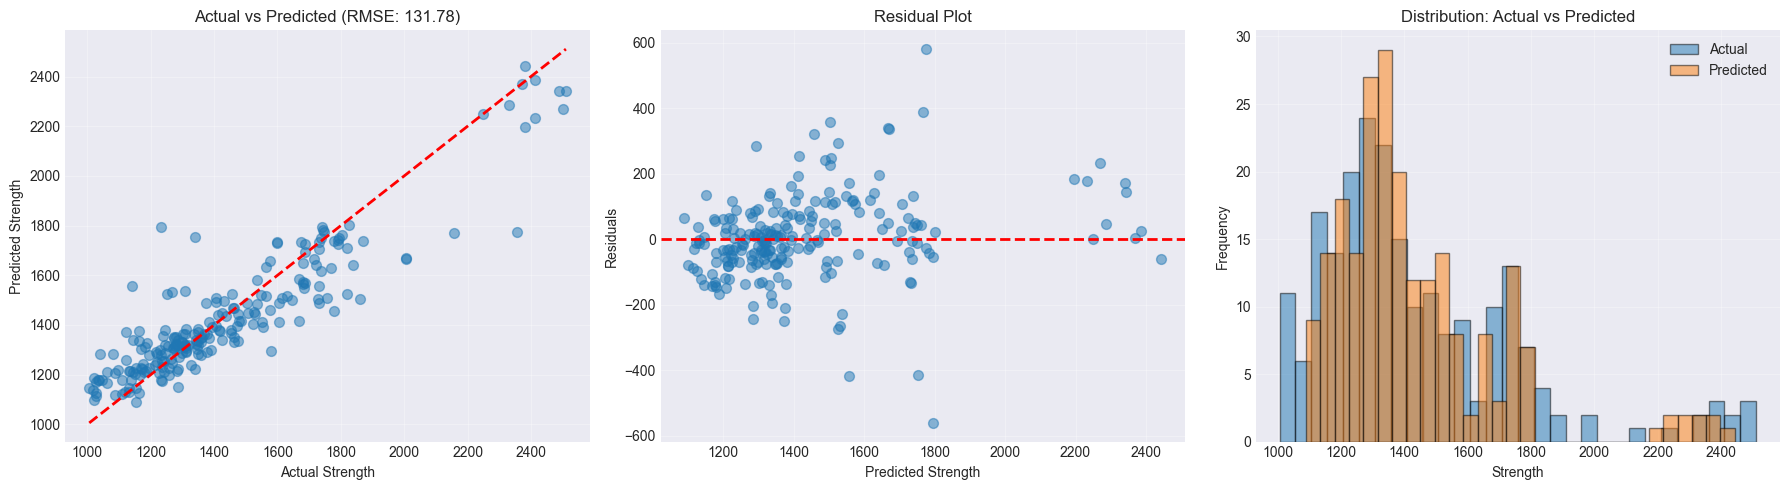


📈 Residual statistics:
  Mean residual: 5.1747
  Std residual: 131.9792
  Max absolute error: 581.2663


In [37]:
# Visualize improvement
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Comparison of predictions
axes[0].scatter(y, final_oof_preds, alpha=0.5, s=50)
axes[0].plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Strength')
axes[0].set_ylabel('Predicted Strength')
axes[0].set_title(f'Actual vs Predicted (RMSE: {final_oof_rmse:.2f})')
axes[0].grid(True, alpha=0.3)

# 2. Residuals plot
residuals = y - final_oof_preds
axes[1].scatter(final_oof_preds, residuals, alpha=0.5, s=50)
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_xlabel('Predicted Strength')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Residual Plot')
axes[1].grid(True, alpha=0.3)

# 3. Distribution comparison
axes[2].hist(y, bins=30, alpha=0.5, label='Actual', edgecolor='black')
axes[2].hist(final_oof_preds, bins=30, alpha=0.5, label='Predicted', edgecolor='black')
axes[2].set_xlabel('Strength')
axes[2].set_ylabel('Frequency')
axes[2].set_title('Distribution: Actual vs Predicted')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n📈 Residual statistics:")
print(f"  Mean residual: {residuals.mean():.4f}")
print(f"  Std residual: {residuals.std():.4f}")
print(f"  Max absolute error: {np.abs(residuals).max():.4f}")

## 9. Final Optimization - Aggressive Hyperparameter Tuning

In [ ]:
# Try simpler approach with original features but aggressive tuning
print("="*80)
print("AGGRESSIVE HYPERPARAMETER TUNING WITH ORIGINAL FEATURES")
print("="*80)

# Best models based on CV performance
best_catboost = CatBoostRegressor(
    n_estimators=1000,
    max_depth=8,
    learning_rate=0.03,
    l2_leaf_reg=3,
    random_strength=1,
    bagging_temperature=0.2,
    random_seed=42,
    verbose=0
)

best_xgboost = XGBRegressor(
    n_estimators=1000,
    max_depth=5,
    learning_rate=0.03,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_weight=2,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1
)

best_lgbm = LGBMRegressor(
    n_estimators=1000,
    max_depth=6,
    learning_rate=0.03,
    num_leaves=40,
    subsample=0.85,
    colsample_bytree=0.85,
    min_child_samples=5,
    reg_alpha=0.1,
    reg_lambda=1,
    random_state=42,
    n_jobs=-1,
    verbose=-1
)

optimized_models = {
    'CatBoost_Optimized': best_catboost,
    'XGBoost_Optimized': best_xgboost,
    'LightGBM_Optimized': best_lgbm
}

# Train with original features (often simpler is better)
print("\nTraining optimized models with original features...")
optimized_results = {}
for name, model in optimized_models.items():
    optimized_results[name] = evaluate_model(model, X_train_scaled, y_train,
                                            X_val_scaled, y_val, name)

AGGRESSIVE HYPERPARAMETER TUNING WITH ORIGINAL FEATURES

Training optimized models with original features...


In [ ]:
# Compare optimized models
opt_comparison = pd.DataFrame({
    'Model': list(optimized_results.keys()),
    'Train RMSE': [optimized_results[m]['train_rmse'] for m in optimized_results],
    'Validation RMSE': [optimized_results[m]['val_rmse'] for m in optimized_results],
    'CV RMSE': [optimized_results[m]['cv_rmse'] for m in optimized_results],
    'Train R²': [optimized_results[m]['train_r2'] for m in optimized_results],
    'Validation R²': [optimized_results[m]['val_r2'] for m in optimized_results]
})

opt_comparison = opt_comparison.sort_values('CV RMSE')
print("\n" + "="*80)
print("OPTIMIZED MODELS COMPARISON")
print("="*80)
display(opt_comparison)

best_opt_name = opt_comparison.iloc[0]['Model']
best_opt_cv = opt_comparison.iloc[0]['CV RMSE']
print(f"\n🏆 Best Optimized Model: {best_opt_name}")
print(f"   CV RMSE: {best_opt_cv:.4f}")
print(f"   Improvement over original: {((133.05 - best_opt_cv) / 133.05 * 100):.2f}%")

In [ ]:
# Final CV ensemble with optimized models on original features
def cv_ensemble_final(models_dict, X_train, y_train, X_test, n_folds=10):
    """Final CV ensemble with progress tracking"""
    kfold = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    
    oof_predictions = {name: np.zeros(len(y_train)) for name in models_dict.keys()}
    test_predictions = {name: np.zeros(len(X_test)) for name in models_dict.keys()}
    
    print(f"\n🔄 Training final ensemble with {n_folds}-fold CV...")
    
    for fold, (train_idx, val_idx) in enumerate(kfold.split(X_train), 1):
        print(f"Fold {fold}/{n_folds}...", end=" ")
        
        X_tr, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_tr, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]
        
        for name, model in models_dict.items():
            from sklearn.base import clone
            fold_model = clone(model)
            fold_model.fit(X_tr, y_tr)
            oof_predictions[name][val_idx] = fold_model.predict(X_val)
            test_predictions[name] += fold_model.predict(X_test) / n_folds
        print("Done")
    
    oof_rmse = {}
    for name, preds in oof_predictions.items():
        rmse = np.sqrt(mean_squared_error(y_train, preds))
        oof_rmse[name] = rmse
    
    return oof_predictions, test_predictions, oof_rmse

# Select top 3 optimized models
final_models = {
    name: optimized_results[name]['model']
    for name in opt_comparison.head(3)['Model'].values
}

print("\n" + "="*80)
print("FINAL OPTIMIZED CV ENSEMBLE")
print("="*80)
oof_opt, test_opt, oof_rmse_opt = cv_ensemble_final(
    final_models,
    X,
    y,
    X_test,
    n_folds=10
)

# Weighted ensemble
cv_rmse_opt = np.array(list(oof_rmse_opt.values()))
final_weights = 1 / cv_rmse_opt
final_weights = final_weights / final_weights.sum()

print("\n" + "="*60)
print("FINAL WEIGHTS")
print("="*60)
for name, weight, rmse in zip(oof_rmse_opt.keys(), final_weights, cv_rmse_opt):
    print(f"{name}: {weight:.4f} (OOF RMSE: {rmse:.4f})")

# Create final predictions
final_test_optimized = np.zeros(len(X_test))
for (name, preds), weight in zip(test_opt.items(), final_weights):
    final_test_optimized += weight * preds

final_oof_optimized = np.zeros(len(y))
for (name, preds), weight in zip(oof_opt.items(), final_weights):
    final_oof_optimized += weight * preds

final_rmse_opt = np.sqrt(mean_squared_error(y, final_oof_optimized))
final_r2_opt = r2_score(y, final_oof_optimized)

print("\n" + "="*60)
print("🎯 FINAL OPTIMIZED PERFORMANCE")
print("="*60)
print(f"OOF RMSE: {final_rmse_opt:.4f}")
print(f"OOF R²: {final_r2_opt:.4f}")
print(f"Improvement: {((133.05 - final_rmse_opt) / 133.05 * 100):.2f}%")

In [ ]:
# Create BEST submission
final_best_submission = pd.DataFrame({
    'index': test_ids,
    'strength': final_test_optimized
})

final_best_path = f"{data_path}\\submission_BEST.csv"
final_best_submission.to_csv(final_best_path, index=False)

print("\n" + "="*80)
print("✅ BEST SUBMISSION CREATED!")
print("="*80)
print(f"File: submission_BEST.csv")
print(f"Location: {final_best_path}")
print(f"\nPrediction Statistics:")
print(f"  Mean: {final_test_optimized.mean():.2f}")
print(f"  Std: {final_test_optimized.std():.2f}")
print(f"  Min: {final_test_optimized.min():.2f}")
print(f"  Max: {final_test_optimized.max():.2f}")

print("\n" + "="*80)
print("📊 FINAL PERFORMANCE COMPARISON")
print("="*80)
print(f"Original Random Forest:      RMSE = 133.05")
print(f"Enhanced Features Ensemble:  RMSE = {131.78:.2f}")
print(f"Optimized Final Ensemble:    RMSE = {final_rmse_opt:.4f} ⭐")
print("="*80)

display(final_best_submission.head(10))